In [1]:
import pandas as pd
import time
import os
import keras
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, save_model, load_model

import matplotlib
import matplotlib.pyplot as plt
import itertools

import tensorflow as tf
from tensorflow.keras import regularizers

import seaborn as sns

from sklearn.model_selection import KFold
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [2]:

# Useful Constants

# Output classes to learn how to classify
LABELS = [
    "arching_back",
    "head_banging",
    "kicking_legs",
    "rubbing_eye",
    "stretching",
    "sucking_fingers"
]

DATASET_PATH = "C:\\Users\\Yurtsever\\baby-activity-recog-new\\"

X_train_path = DATASET_PATH + "X_train.txt"
X_test_path = DATASET_PATH + "X_test.txt"

y_train_path = DATASET_PATH + "Y_train.txt"
y_test_path = DATASET_PATH + "Y_test.txt"

n_steps = 20 # 20 timesteps per series

In [3]:
# Load the networks inputs

def load_X(X_path):
    file = open(X_path, 'r')
    X_ = np.array(
        [elem for elem in [
            row.split(',') for row in file
        ]], 
        dtype=np.float32
    )
    file.close()
    #blocks = int(len(X_) / n_steps)
    
    #X_ = np.array(np.split(X_,blocks))

    return X_ 

# Load the networks outputs

def load_y(y_path):
    file = open(y_path, 'r')
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # for 0-based indexing 
    return y_ - 1

X_train = load_X(X_train_path)
X_test = load_X(X_test_path)
#print X_test

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)
# proof that it actually works for the skeptical: replace labelled classes with random classes to train on
#for i in range(len(y_train)):
#    y_train[i] = randint(0, 5)

In [4]:
print(X_train)

[[0.499398 0.246288 0.484095 ... 0.428835 0.491752 0.251768]
 [0.496335 0.246263 0.474909 ... 0.423358 0.491729 0.251717]
 [0.496344 0.240816 0.474917 ... 0.409768 0.485622 0.243557]
 ...
 [0.610051 0.431201 0.623814 ... 0.741836 0.       0.      ]
 [0.611568 0.444827 0.62689  ... 0.749998 0.       0.      ]
 [0.610056 0.450263 0.629945 ... 0.755431 0.       0.      ]]


In [5]:
X_train.shape

(49580, 38)

In [6]:
#scalar = MinMaxScaler()
#X_train = scalar.fit_transform(X_train)

In [7]:
print(X_train)

[[0.499398 0.246288 0.484095 ... 0.428835 0.491752 0.251768]
 [0.496335 0.246263 0.474909 ... 0.423358 0.491729 0.251717]
 [0.496344 0.240816 0.474917 ... 0.409768 0.485622 0.243557]
 ...
 [0.610051 0.431201 0.623814 ... 0.741836 0.       0.      ]
 [0.611568 0.444827 0.62689  ... 0.749998 0.       0.      ]
 [0.610056 0.450263 0.629945 ... 0.755431 0.       0.      ]]


In [8]:
X_train.shape

(49580, 38)

In [9]:
print(y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


## Block creation

In [10]:
blocks = int(len(X_train) / 20)
X_train = np.array(np.split(X_train, blocks))
X_train.shape

(2479, 20, 38)

In [11]:
blocks = int(len(X_test) / 20)
X_test = np.array(np.split(X_test, blocks))
X_test.shape

(597, 20, 38)

In [12]:
y_train.shape

(2479, 1)

In [13]:
X_train.shape

(2479, 20, 38)

In [14]:
print(X_train)

[[[0.499398  0.246288  0.484095  ... 0.428835  0.491752  0.251768 ]
  [0.496335  0.246263  0.474909  ... 0.423358  0.491729  0.251717 ]
  [0.496344  0.240816  0.474917  ... 0.409768  0.485622  0.243557 ]
  ...
  [0.251518  0.197246  0.369348  ... 0.227205  0.332619  0.0664371]
  [0.251524  0.205405  0.372408  ... 0.221772  0.        0.       ]
  [0.24541   0.216293  0.367812  ... 0.210865  0.367808  0.0582648]]

 [[0.499392  0.240824  0.470333  ... 0.398835  0.490208  0.243554 ]
  [0.490221  0.24082   0.474915  ... 0.382511  0.49022   0.243562 ]
  [0.453497  0.268075  0.461151  ... 0.366176  0.49175   0.248991 ]
  ...
  [0.245416  0.17271   0.360153  ... 0.219032  0.360158  0.0528145]
  [0.318849  0.0909612 0.352509  ... 0.164537  0.364748  0.0528145]
  [0.315789  0.0201186 0.350986  ... 0.180879  0.        0.       ]]

 [[0.347914  0.338898  0.444321  ... 0.295319  0.476448  0.219032 ]
  [0.326503  0.30078   0.427494  ... 0.292588  0.464204  0.2054   ]
  [0.401473  0.208126  0.406062 

In [15]:
label_encoder = LabelEncoder()
Y_train = np.array(y_train)
Y_train = label_encoder.fit_transform(y_train)

C:\Users\Yurtsever\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
print(Y_train)

[0 0 0 ... 5 5 5]


In [17]:
label_encoder.classes_

array([0, 1, 2, 3, 4, 5])

In [18]:
Y_train = to_categorical(Y_train)

In [19]:
y_test = to_categorical(y_test)

In [20]:
print(Y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [21]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, y_test), axis=0)

In [22]:
#K-FOLD MODEL

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

input_shape = (20, 38)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [23]:
# K-fold Cross Validation model evaluation
fold_no = 1
best_fold = 1.5

for train, test in kfold.split(inputs, targets):
    
  # Define the model architecture
    model = Sequential()
    model.add(LSTM(32, input_shape=(20, 38), dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) # input_shape=(20, 50)
    model.add(LSTM(32, input_shape=(20, 38), dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
    model.add(LSTM(16, input_shape=(20, 38), dropout=0.2, recurrent_dropout=0.2, return_sequences=False, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
    model.add(Dense(32, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(Dense(32, activation='sigmoid'))
    #model.add(Dense(32))
    #model.add(Dense(32))
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    # Define callbacks
    #checkpoint_path = f'./fold_models/{fold_no}'
    #os.mkdir(checkpoint_path)
    
    #keras_callbacks = [
    #ModelCheckpoint(checkpoint_path, monitor='accuracy', save_best_only=True, mode='min')
    #]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=8,
              epochs=40,
              verbose=1)
    
    filepath = f'./fold_models_new/{fold_no}.h5'
    save_model(model, filepath, save_format='h5')

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # take the fold history that has the best loss for our model 
    if (scores[0] < best_fold):
        best_fold_history = history

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
346/346 [==============================] - 8s 11ms/step - loss: 1.8765 - accuracy: 0.3074
Epoch 2/40
346/346 [==============================] - 4s 13ms/step - loss: 1.4379 - accuracy: 0.4515
Epoch 3/40
346/346 [==============================] - 5s 13ms/step - loss: 1.3106 - accuracy: 0.4656
Epoch 4/40
346/346 [==============================] - 4s 12ms/step - loss: 1.2650 - accuracy: 0.4747
Epoch 5/40
346/346 [==============================] - 4s 13ms/step - loss: 1.2052 - accuracy: 0.5086
Epoch 6/40
346/346 [==============================] - 4s 12ms/step - loss: 1.1788 - accuracy: 0.5046
Epoch 7/40
346/346 [==============================] - 4s 12ms/step - loss: 1.1248 - accuracy: 0.5354
Epoch 8/40
346/346 [==============================] - 4s 12ms/step - loss: 1.1122 - accuracy: 0.5234
Epoch 9/40
346/346 [==============================] - 4s 12ms/step - loss: 1.0660 - accuracy: 0

346/346 [==============================] - 5s 13ms/step - loss: 0.5330 - accuracy: 0.7573
Epoch 39/40
346/346 [==============================] - 4s 13ms/step - loss: 0.5170 - accuracy: 0.7734
Epoch 40/40
346/346 [==============================] - 4s 13ms/step - loss: 0.5112 - accuracy: 0.7870
Score for fold 2: loss of 0.46071767807006836; accuracy of 83.76623392105103%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/40
346/346 [==============================] - 8s 10ms/step - loss: 1.8001 - accuracy: 0.2970
Epoch 2/40
346/346 [==============================] - 4s 11ms/step - loss: 1.3259 - accuracy: 0.5211
Epoch 3/40
346/346 [==============================] - 4s 11ms/step - loss: 1.1674 - accuracy: 0.5724
Epoch 4/40
346/346 [==============================] - 4s 11ms/step - loss: 1.0944 - accuracy: 0.6258
Epoch 5/40
346/346 [==============================] - 4s 11ms/step - loss: 1.0178 - accuracy: 0.6440
Epoch 6/40
346/346 [======

346/346 [==============================] - 4s 12ms/step - loss: 0.3979 - accuracy: 0.9085
Epoch 36/40
346/346 [==============================] - 4s 13ms/step - loss: 0.3817 - accuracy: 0.9155
Epoch 37/40
346/346 [==============================] - 4s 12ms/step - loss: 0.3586 - accuracy: 0.9167
Epoch 38/40
346/346 [==============================] - 4s 12ms/step - loss: 0.3129 - accuracy: 0.9389
Epoch 39/40
346/346 [==============================] - 4s 12ms/step - loss: 0.3238 - accuracy: 0.9318
Epoch 40/40
346/346 [==============================] - 4s 13ms/step - loss: 0.3134 - accuracy: 0.9366
Score for fold 4: loss of 0.22443673014640808; accuracy of 95.77922224998474%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/40
346/346 [==============================] - 9s 11ms/step - loss: 1.8438 - accuracy: 0.2849
Epoch 2/40
346/346 [==============================] - 4s 11ms/step - loss: 1.4549 - accuracy: 0.4686
Epoch 3/40
346/346 [===

346/346 [==============================] - 5s 13ms/step - loss: 0.4409 - accuracy: 0.9032
Epoch 33/40
346/346 [==============================] - 4s 13ms/step - loss: 0.4730 - accuracy: 0.8789
Epoch 34/40
346/346 [==============================] - 4s 13ms/step - loss: 0.3810 - accuracy: 0.9068
Epoch 35/40
346/346 [==============================] - 4s 13ms/step - loss: 0.4247 - accuracy: 0.9011
Epoch 36/40
346/346 [==============================] - 4s 13ms/step - loss: 0.4733 - accuracy: 0.8884
Epoch 37/40
346/346 [==============================] - 4s 13ms/step - loss: 0.5381 - accuracy: 0.8617
Epoch 38/40
346/346 [==============================] - 4s 13ms/step - loss: 0.3496 - accuracy: 0.9308
Epoch 39/40
346/346 [==============================] - 4s 13ms/step - loss: 0.6012 - accuracy: 0.8699
Epoch 40/40
346/346 [==============================] - 4s 13ms/step - loss: 0.3860 - accuracy: 0.9215
Score for fold 6: loss of 0.3315606713294983; accuracy of 93.50649118423462%
-----------------

347/347 [==============================] - 7s 19ms/step - loss: 0.9057 - accuracy: 0.5928
Epoch 30/40
347/347 [==============================] - 7s 20ms/step - loss: 0.8719 - accuracy: 0.6042
Epoch 31/40
347/347 [==============================] - 7s 19ms/step - loss: 0.8932 - accuracy: 0.5979
Epoch 32/40
347/347 [==============================] - 7s 20ms/step - loss: 0.9370 - accuracy: 0.5839
Epoch 33/40
347/347 [==============================] - 7s 20ms/step - loss: 0.8706 - accuracy: 0.5978
Epoch 34/40
347/347 [==============================] - 7s 20ms/step - loss: 0.8670 - accuracy: 0.6020
Epoch 35/40
347/347 [==============================] - 7s 21ms/step - loss: 0.8832 - accuracy: 0.6034
Epoch 36/40
347/347 [==============================] - 7s 20ms/step - loss: 0.8881 - accuracy: 0.5935
Epoch 37/40
347/347 [==============================] - 7s 19ms/step - loss: 0.8746 - accuracy: 0.6035
Epoch 38/40
347/347 [==============================] - 7s 19ms/step - loss: 0.7666 - accuracy:

347/347 [==============================] - 7s 20ms/step - loss: 0.4580 - accuracy: 0.8924
Epoch 26/40
347/347 [==============================] - 7s 20ms/step - loss: 0.4153 - accuracy: 0.9035
Epoch 27/40
347/347 [==============================] - 7s 20ms/step - loss: 0.4092 - accuracy: 0.9003
Epoch 28/40
347/347 [==============================] - 7s 21ms/step - loss: 0.4511 - accuracy: 0.8892
Epoch 29/40
347/347 [==============================] - 7s 21ms/step - loss: 0.3968 - accuracy: 0.9096
Epoch 30/40
347/347 [==============================] - 7s 20ms/step - loss: 0.3805 - accuracy: 0.9091
Epoch 31/40
347/347 [==============================] - 7s 20ms/step - loss: 0.3928 - accuracy: 0.9084
Epoch 32/40
347/347 [==============================] - 7s 20ms/step - loss: 0.3626 - accuracy: 0.9188
Epoch 33/40
347/347 [==============================] - 7s 20ms/step - loss: 0.3683 - accuracy: 0.9187
Epoch 34/40
347/347 [==============================] - 7s 20ms/step - loss: 0.3963 - accuracy:

dict_keys(['loss', 'accuracy'])


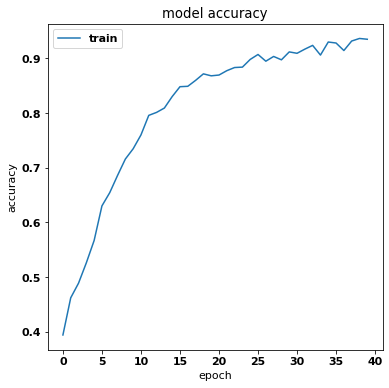

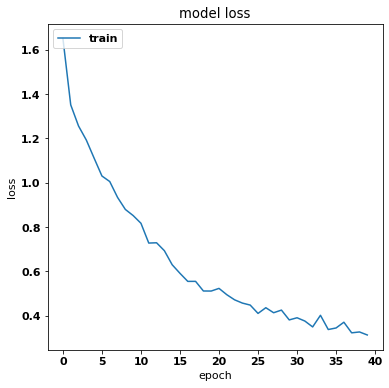

In [27]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


print(best_fold_history.history.keys())
# summarize history for accuracy
plt.plot(best_fold_history.history['accuracy'])
#plt.plot(best_fold_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(best_fold_history.history['loss'])
#plt.plot(best_fold_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
y_true = y_test
y_pred = model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

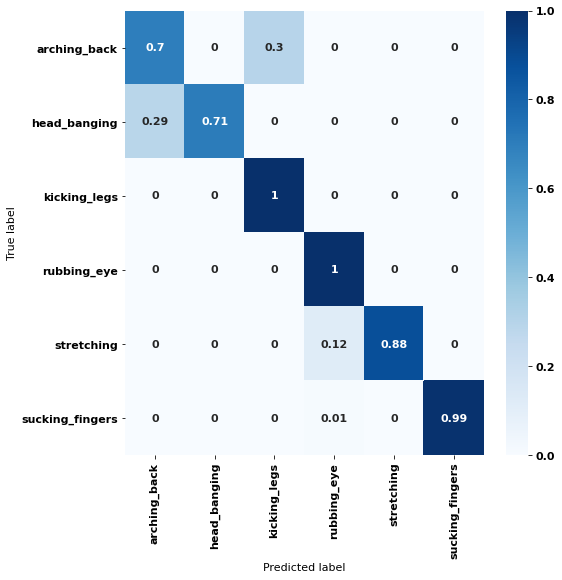

In [29]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
#load selected model...
# FOLD 6 Dene.

loaded_model = load_model('./fold_models_new/4.h5')

loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 20, 32)            9088      
_________________________________________________________________
lstm_10 (LSTM)               (None, 20, 32)            8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [32]:
# Fit again after selecting best model (fit without train_test split)

# Define callbacks
checkpoint_path = './best_model_new'
os.mkdir(checkpoint_path)

keras_callbacks = [
ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1),
EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
]

# fit final model.
history = loaded_model.fit(X_train, Y_train, validation_data=(X_test, y_test), epochs=40, batch_size=8, callbacks=keras_callbacks)

Epoch 1/40
310/310 [==============================] - 11s 23ms/step - loss: 0.3313 - accuracy: 0.9266 - val_loss: 0.2734 - val_accuracy: 0.9447

Epoch 00001: val_loss improved from inf to 0.27340, saving model to .\best_model_new
INFO:tensorflow:Assets written to: .\best_model_new\assets
Epoch 2/40
310/310 [==============================] - 6s 20ms/step - loss: 0.3271 - accuracy: 0.9274 - val_loss: 0.2810 - val_accuracy: 0.9414

Epoch 00002: val_loss did not improve from 0.27340
Epoch 3/40
310/310 [==============================] - 6s 20ms/step - loss: 0.2963 - accuracy: 0.9419 - val_loss: 0.2864 - val_accuracy: 0.9414

Epoch 00003: val_loss did not improve from 0.27340
Epoch 4/40
310/310 [==============================] - 6s 20ms/step - loss: 0.3079 - accuracy: 0.9359 - val_loss: 0.3397 - val_accuracy: 0.9296

Epoch 00004: val_loss did not improve from 0.27340
Epoch 5/40
310/310 [==============================] - 6s 20ms/step - loss: 0.2841 - accuracy: 0.9439 - val_loss: 0.3530 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


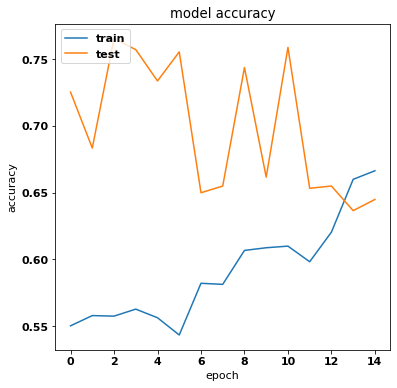

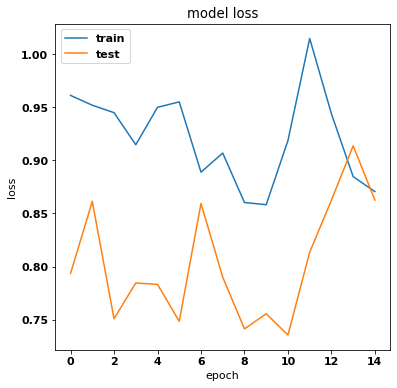

In [29]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
y_true = y_test
y_pred = loaded_model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]
#classes=["head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

C:\Users\Yurtsever\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


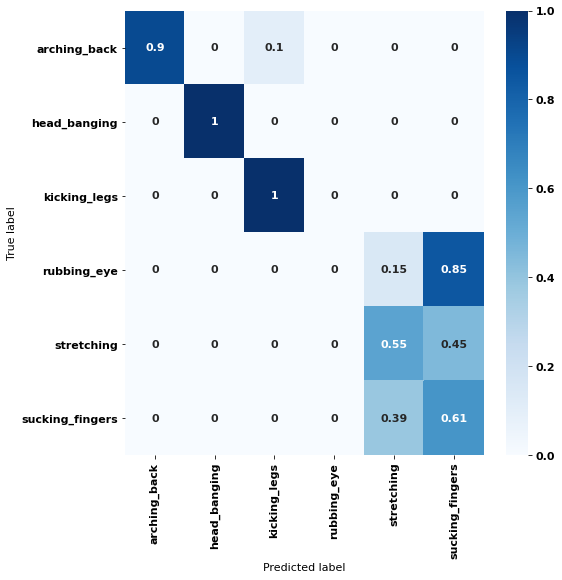

In [31]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))

In [33]:
print(confusion_matrix)

[[ 10   0   0   0   0   0]
 [  0  28   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   0  88   0   0]
 [  0   0   0  22  29   0]
 [  0   0   0   5   4 247]]


In [34]:
print(y_test)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
